In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

# Machine learning

### Learning type is multi class image classification and Random Forest and KNN models are used

## Data loading

In [2]:
#Loading the training and test data
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin')
    return dict

tr_batch_1 = unpickle('data_batch_1')
tr_batch_2 = unpickle('data_batch_2')
tr_batch_3 = unpickle('data_batch_3')
tr_batch_4 = unpickle('data_batch_4')
tr_batch_5 = unpickle('data_batch_5')
batch_test = unpickle('test_batch')

print(tr_batch_1['data'].shape)

(10000, 3072)


In [3]:
#Reshaping training and test data features
def reshape(batch):
    result=np.reshape(batch,(10000,3,32,32)).transpose(0,2,3,1)
    return result

bat1_data=reshape(tr_batch_1['data'])
bat2_data=reshape(tr_batch_2['data'])
bat3_data=reshape(tr_batch_3['data'])
bat4_data=reshape(tr_batch_4['data'])
bat5_data=reshape(tr_batch_5['data'])
test_x=reshape(batch_test['data'])

In [4]:
#concatenating all the training data features
train_x = np.concatenate([bat1_data, bat1_data, bat1_data, bat1_data, bat1_data])
print("Train data")
print(train_x.shape)

#concatenating all the training data labels
train_y = np.concatenate([tr_batch_1['labels'], tr_batch_1['labels'], tr_batch_1['labels'], tr_batch_1['labels'], tr_batch_1['labels']])
print(train_y.shape)

print(train_x[0])#displaying 1st image

Train data
(50000, 32, 32, 3)
(50000,)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [5]:
print("Test data")
print(test_x.shape)

#test data labels
test_y = batch_test['labels']
test_y = np.array(test_y)
print(test_y.shape)

Test data
(10000, 32, 32, 3)
(10000,)


## Data Exploration

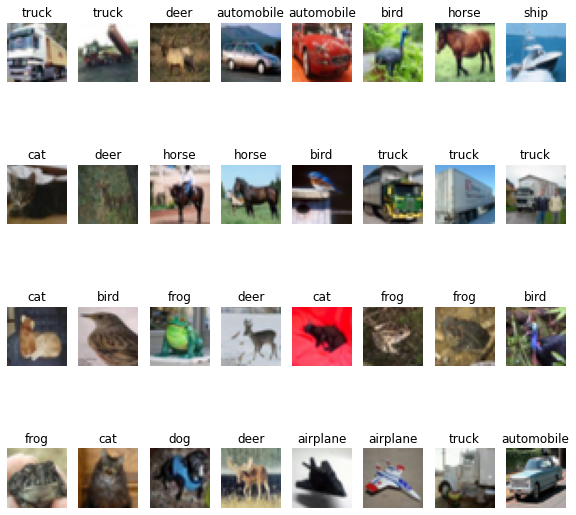

In [6]:
#labels of classes
label = ["airplane","automobile","bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

#displaying images from different classes
fig = plt.figure(figsize=(10, 10))
col = 8
row = 4
index = 0
for i in range(1, col*row +1):
    img = train_x[i]
    fig.add_subplot(row, col, i)
    plt.axis('off')
    plt.title(label[train_y[i]])
    plt.imshow(img)
plt.show()

## Data pre processing

In [7]:
#normalizing the data
train_x = train_x.astype('float32') 
train_x /= 255
test_x = test_x.astype('float32')
test_x /= 255

print(train_x[0])#displaying image after normalizing

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


## Feature extraction

### Image reshaping: extracting pixels as features

In [8]:
#Image reshaping for training images
train_x1 = []
for image in train_x:
    pix = np.reshape(image, (32*32*3))
    train_x1.append(pix)

train_x1 = np.array(train_x1)
print("Training data:", train_x1.shape)

#Image reshaping for test images
test_x1 = []
for image in test_x:
    pixt = np.reshape(image, (32*32*3))
    test_x1.append(pixt)

test_x1 = np.array(test_x1)
print("Test data:", test_x1.shape)

Training data: (50000, 3072)
Test data: (10000, 3072)


## Using Random forest model and hyperparameter tuning max_leaf_nodes

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix

#selected Random forest learning algorithm
#Hyperparameter tuning Random forest model for parameter max_leaf_nodes
n = np.arange(5, 19)
cscores = []
for node in n:
    mod_node = RandomForestClassifier(random_state=42, n_estimators= 8, \
                               max_depth= 8, min_samples_leaf= 8, min_samples_split = 26,\
                              max_leaf_nodes =node)
    s = cross_val_score(mod_node, train_x1, train_y, cv=5, scoring='accuracy')
    cscores.append(s.mean())
best_maxleaf_node = n[np.argmax(cscores)]
print('cscores:', cscores )
print('Best max leaf node to use:', best_maxleaf_node)


cscores: [0.2566, 0.2683, 0.2812, 0.29, 0.2965, 0.3063, 0.3107, 0.3127, 0.3162, 0.3196, 0.329, 0.3325, 0.3352, 0.3372]
Best max leaf node to use: 18


## Training the model with best hyperparameter

In [10]:
#Train the random forest model with best_maxleaf_node 

RF = RandomForestClassifier(random_state=42, n_estimators= 8, \
                               max_depth= 8, min_samples_leaf= 8, min_samples_split = 26,\
                              max_leaf_nodes =best_maxleaf_node)
RF.fit(train_x1, train_y)

RandomForestClassifier(max_depth=8, max_leaf_nodes=18, min_samples_leaf=8,
                       min_samples_split=26, n_estimators=8, random_state=42)

## Assessing the performance of Random forest on test data

In [11]:
# Evaluate the performance of the trained random forest model 
# Confusion matrix

y_pred = RF.predict(test_x1)#applying the model on test data
print('confusion_matrix:')
print(confusion_matrix(test_y, y_pred))

# Accuracy
accuracy_R1 = accuracy_score(test_y, y_pred)
print('accuracy: %.2f' % accuracy_R1)

confusion_matrix:
[[423  40   6   8  36  77  58  38 247  67]
 [ 69 258   4   6  35  81 140  40 115 252]
 [129  58   5  10 277 127 203  74  61  56]
 [ 93  57   1  26 133 223 245  91  37  94]
 [ 48  24   4  13 390 115 256  63  41  46]
 [ 74  60   4  19 145 357 161  85  26  69]
 [ 46  37   4  17 211  90 456  55  15  69]
 [ 58  68   3  18 166 143  84 220  70 170]
 [105  80   3   2  17  99  39  33 499 123]
 [ 80  88   0   6  19  38  85  56 142 486]]
accuracy: 0.31


## Using KNN model and hyperparameter tuning n_neighbors

In [26]:
from sklearn.neighbors import KNeighborsClassifier

##Selected KNN Learning Algorithm
#Hyperparameter tuning KNN model for parameter n_neighbors
n = np.arange(9, 16, 2)
cscores1 = []
for k in n:
    knn = KNeighborsClassifier(n_neighbors=k)
    s = cross_val_score(knn, train_x1, train_y, cv=5, scoring='accuracy')
    cscores1.append(s.mean())
best_k = n[np.argmax(cscores1)]
print('cscores:', cscores1 )
print('Best k to use:', best_k)

cscores: [0.5939, 0.5939, 0.5435, 0.5435]
Best k to use: 9


## Training the KNN model with best hyperparameter

In [27]:
#Train the KNN model with best value of K
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(train_x1, train_y)

KNeighborsClassifier(n_neighbors=9)

## Assessing the performance of KNN on test data

In [28]:
# Evaluate the performance of the trained KNN model 
# Confusion matrix

y_pred = knn.predict(test_x1)#applying model on test data
print('confusion_matrix:')
print(confusion_matrix(test_y, y_pred))

# Accuracy
accuracy_K1 = accuracy_score(test_y, y_pred)
print('accuracy: %.2f' % accuracy_K1)

confusion_matrix:
[[413  12 154  27  75  21  32  14 239  13]
 [121 157 103  59 145  49 110  21 204  31]
 [ 99   5 345  64 245  45 109  21  62   5]
 [ 61   8 197 148 182 119 173  39  58  15]
 [ 62   4 248  55 396  40 119  22  51   3]
 [ 65   6 170 139 173 203 134  33  67  10]
 [ 26   4 225  89 241  63 298  12  37   5]
 [ 77   5 157  68 228  76  91 207  79  12]
 [149  32  65  29  49  30  48  15 565  18]
 [127  52  97  53 131  46  79  38 232 145]]
accuracy: 0.29


### Accuracy of Random Forest is better than KNN and overfitting has been avoided in random Forest

## Optional Analysis(Feature extraction method): 3D color histogram

In [29]:
print(train_x.shape)
print(test_x.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [30]:
#Computing color histogram for training images
train_x2 = []
for image in train_x:
    histogram = cv2.calcHist([image], [0, 1, 2],None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    histogram = histogram.flatten()
    train_x2.append(histogram)

train_x2 = np.array(train_x2)
print("Training data:", train_x2.shape)

#Computing color histogram for test images
test_x2 = []
for image in test_x:
    histogram_test = cv2.calcHist([image], [0, 1, 2],None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    histogram_test = histogram_test.flatten()
    test_x2.append(histogram_test)

test_x2 = np.array(test_x2)
print("Test data:",test_x2.shape)

Training data: (50000, 512)
Test data: (10000, 512)


## Using Random forest model and hyperparameter tuning max_leaf_nodes

In [31]:
#Hyperparameter tuning Random forest model
n = np.arange(5, 19)
cscores = []
for node in n:
    mod_node = RandomForestClassifier(random_state=42, n_estimators= 8, \
                               max_depth= 8, min_samples_leaf= 8, min_samples_split = 26,\
                              max_leaf_nodes =node)
    s = cross_val_score(mod_node, train_x2, train_y, cv=5, scoring='accuracy')
    cscores.append(s.mean())
best_maxleaf_node = n[np.argmax(cscores)]
print('cscores:', cscores )
print('Best max leaf node to use:', best_maxleaf_node)

cscores: [0.10300000000000001, 0.10300000000000001, 0.10300000000000001, 0.10300000000000001, 0.10300000000000001, 0.10300000000000001, 0.10300000000000001, 0.10300000000000001, 0.10300000000000001, 0.10300000000000001, 0.10300000000000001, 0.10300000000000001, 0.10300000000000001, 0.10300000000000001]
Best max leaf node to use: 5


## Training the model with best hyperparameter

In [32]:
#Train the random forest model with best_maxleaf_node 

RF = RandomForestClassifier(random_state=42, n_estimators= 8, \
                               max_depth= 8, min_samples_leaf= 8, min_samples_split = 26,\
                              max_leaf_nodes =best_maxleaf_node)
RF.fit(train_x2, train_y)

RandomForestClassifier(max_depth=8, max_leaf_nodes=5, min_samples_leaf=8,
                       min_samples_split=26, n_estimators=8, random_state=42)

## Assessing the performance on test data for 3D color histogram feature extraction

In [33]:
# Evaluate the performance of the trained KNN model 
# Confusion matrix

y_pred = RF.predict(test_x2)
print('confusion_matrix:')
print(confusion_matrix(test_y, y_pred))

# Accuracy
accuracy_hist = accuracy_score(test_y, y_pred)
print('accuracy: %.2f' % accuracy_hist)

confusion_matrix:
[[   0    0 1000    0    0    0    0    0    0    0]
 [   0    0 1000    0    0    0    0    0    0    0]
 [   0    0 1000    0    0    0    0    0    0    0]
 [   0    0 1000    0    0    0    0    0    0    0]
 [   0    0 1000    0    0    0    0    0    0    0]
 [   0    0 1000    0    0    0    0    0    0    0]
 [   0    0 1000    0    0    0    0    0    0    0]
 [   0    0 1000    0    0    0    0    0    0    0]
 [   0    0 1000    0    0    0    0    0    0    0]
 [   0    0 1000    0    0    0    0    0    0    0]]
accuracy: 0.10


## Task 3: Model Comparisons

                                   Model  Accuracy
0  Machine Learning: Random Forest model    0.3120
1            Machine Learning: KNN model    0.2877
2               Deep Learning: VGG model    0.7671


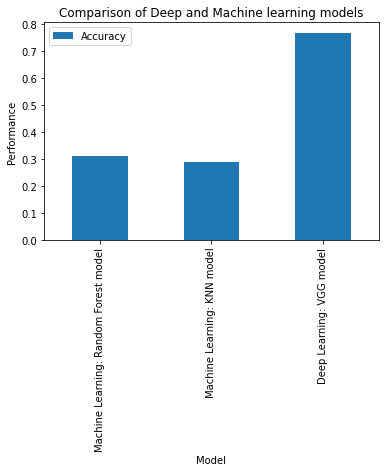

In [34]:
#Deep Learning accuracy obtained from development_DL.ipynb file
Deep_accuracy = 0.7671

#Comparing the models performance on test data with graphical visualisation
data = [['Machine Learning: Random Forest model', accuracy_R1], ['Machine Learning: KNN model', accuracy_K1],\
       ['Deep Learning: VGG model', Deep_accuracy]]
dfm = pd.DataFrame(data, columns = ['Model', 'Accuracy'])
print(dfm)

dfm.plot( kind='bar',x= 'Model', y=['Accuracy'], title='Comparison of Deep and Machine learning models')

#x-axis label
plt.xlabel("Model")

#y-axis label
plt.ylabel("Performance")

#Show plot
plt.show()

### Performance of Deep Learning model(VGG) is better than Machine Learning models
### Huge difference in performance between Deep learning and Machine learning models
### VGG has the highest accuracy followed by Random Forest and KNN has the least accuracy